# Fig 7.4 - Luminosity Evolution of Low-Mass Stars

Figure 7.4 from Chapter 7 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

Luminosity evolution of low-mass stars, brown dwarfs, and gas giant planets. Data are a representative sample 
of raw M dwarf, brown dwarf, and giant planet models from Burrows et al. 1993 (Ap.J. 406, 158) and Burrows et 
al. 1997 (Ap.J. 491, 856). Masses of 0.01, 0.02, 0.03, 0.04, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075-0.08, 
0.085, 0.09, 0.095, and 0.1 solar masses, 1-9 Jupiter masses (.001-.009), and of 20 and 25 Jupiter masses are 
included (along with a few extras to taste). 

We plot a subset for clarity.

In [1]:
%matplotlib inline

import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig7_4.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Data Files

Data are from Burrows et al. 1993 and 1997 from www.astro.princeton.edu/~burrows.  Filenames converted to the form "burrows93_M###.txt", where "###" is the mass in units of 0.001M$_\odot$.  

Files are in the folder `Burrows93`, with rootname `burrows93_M` to which we append the mass coding.

The original data were converted into units of Myr vs luminosity in L$_\odot$.  We read only what we need
for the figure.

In [3]:
lmStars = [0.2,0.125,0.08] # Msun
brownDwarfs = [0.07,0.04,0.025,0.014]
gasGiants = [0.01,0.006,0.003,0.002]

# Data file subfolder and rootname

fileRoot = './Burrows93/burrows93_M'

# data limits

minAge = 0.2 # Myr
maxAge = 50000
minL = 5.0e-10 # Lsun
maxL = 5.0 

## Make the plot

Plot low-mass stars as solid lines, brown dwarfs as dotted lines, and gas giant planets as dashed lines. Curves are labeled with the mass of the object in solar masses.

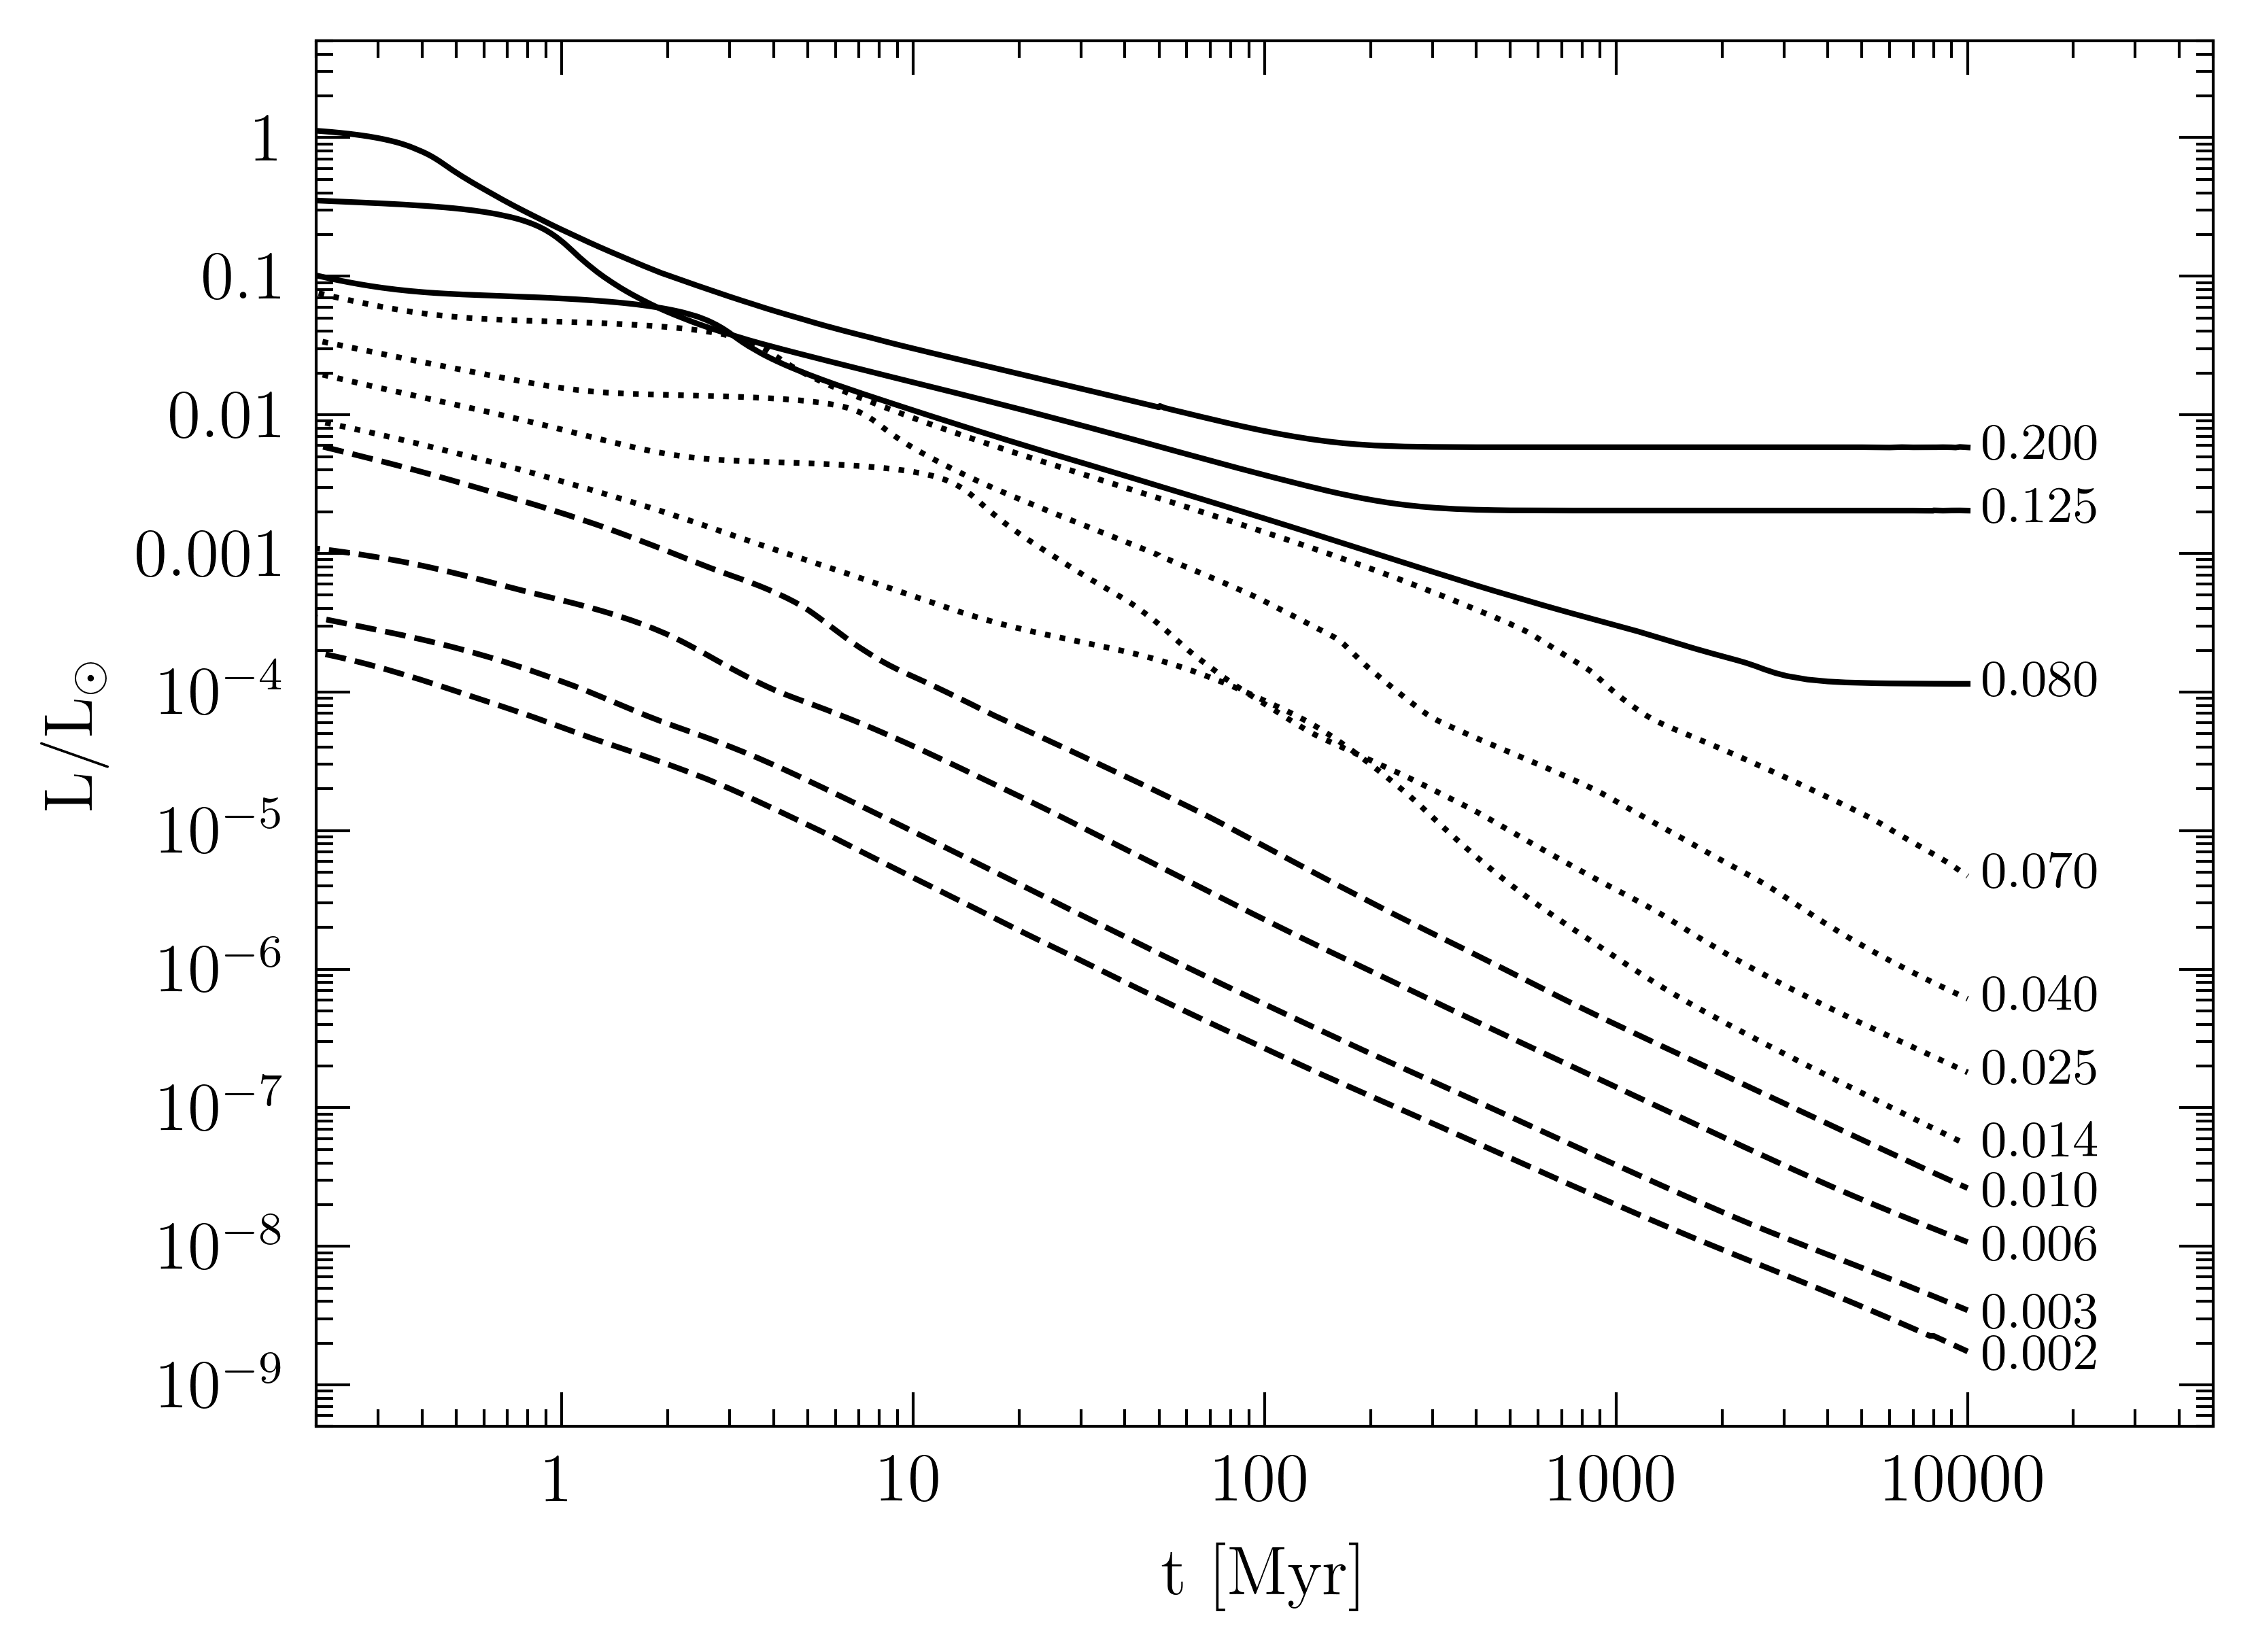

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_xlim(minAge,maxAge)
ax.set_xscale('log')
ax.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.xaxis.set_minor_formatter(NullFormatter())
ax.set_xticks([1,10,100,1000,10000])
ax.set_xticklabels(['1','10','100','1000','10000'])
ax.set_xlabel(r't [Myr]',fontsize=axisFontSize)

ax.set_ylim(minL,maxL)
ax.set_yscale('log')
ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.yaxis.set_minor_formatter(NullFormatter())
ax.set_yticks([1.0E-9,1.0E-8,1.0e-7,1.0E-6,1.0e-5,1.0e-4,0.001,0.01,0.1,1])
ax.set_yticklabels(['$10^{-9}$','10$^{-8}$','10$^{-7}$','10$^{-6}$','10$^{-5}$','10$^{-4}$',
                    '0.001','0.01','0.1','1'])
ax.set_ylabel(r'L/L$_\odot$',fontsize=axisFontSize)

# now start making the plots

massFontSize = 9

for mass in lmStars:
    dataFile = f'{fileRoot}{int(1000*mass):03d}.txt'
    trackLabel = f'{mass:.3f}'
    trackData = pd.read_csv(dataFile,sep=r'\s+',skiprows=3,header=None)
    age = trackData[0].tolist()
    lum = trackData[1].tolist()
    ax.plot(age,lum,'-',color='black',lw=1,zorder=10)
    ax.text(age[-1]+1000,lum[-1],trackLabel,color='black',fontsize=massFontSize,va='center',ha='left')
    
for mass in brownDwarfs:
    dataFile = f'{fileRoot}{int(1000*mass):03d}.txt'
    trackLabel = f'{mass:.3f}'
    trackData = pd.read_csv(dataFile,sep=r'\s+',skiprows=3,header=None)
    age = trackData[0].tolist()
    lum = trackData[1].tolist()
    ax.plot(age,lum,':',color='black',lw=1,zorder=10)
    ax.text(age[-1]+1000,lum[-1],trackLabel,color='black',fontsize=massFontSize,va='center',ha='left')
    
for mass in gasGiants:
    dataFile = f'{fileRoot}{int(1000*mass):03d}.txt'
    trackLabel = f'{mass:.3f}'
    trackData = pd.read_csv(dataFile,sep=r'\s+',skiprows=3,header=None)
    age = trackData[0].tolist()
    lum = trackData[1].tolist()
    ax.plot(age,lum,'--',color='black',lw=1,zorder=10)
    ax.text(age[-1]+1000,0.9*lum[-1],trackLabel,color='black',fontsize=massFontSize,va='center',ha='left')
    
plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')